# Neural Networks Part 1

Referenced Textbook: https://cobweb.cs.uga.edu/~jam/scalation_guide/comp_data_science.pdf

Specifically Chapter 10 - Section 4 (Starting on page 319)

## What is a Perceptron?

Essentaily, it is a neural network at its most basic.

A single-layer perceptron is the basic unit of a neural network. A perceptron consists of input values, weights and a bias, a weighted sum and activation function.

The perceptron was first introduced by American psychologist, Frank Rosenblatt in 1957 at Cornell Aeronautical Laboratory (here is a link to the original paper if you are interested). Rosenblatt was heavily inspired by the biological neuron and its ability to learn. Rosenblatt’s perceptron consists of one or more inputs, a processor, and only one output.

![](../pics/perceptron/ptron.png)

For more info on the background and theory of perceptron see the link below:

https://towardsdatascience.com/what-is-a-perceptron-basics-of-neural-networks-c4cfea20c590

## How Perceptrons Work

More precisely we can think about it in the following way:

![](../pics/perceptron/per_train.png)

x = input x vectors (x columns) <br>
y = input y vector (target column) <br>
b = weights <br>
y_hat = fa(b . x) = vector of predicted values <br>
epsilon = vector of errors <br>

### Calculating Errors

Now lets run through the guts of how this perceptron will work!

We will start with the model equation from linear regression

![](../pics/perceptron/m1.jpg)

Now, we need to take the linear combination of inputs, b dot x, and apply an activation function denoted here as f(). 

For those unfamiliar with activation functions, An activation function in a neural network defines how the weighted sum of the input is transformed into an output from a node or nodes in a layer of the network. Essentailly at the most basic level functioning as a sort of "on" or "off" switch. Common examples include Sigmoid, Tanh, and reLU. 


![](../pics/perceptron/m2.jpg)

Just to show what this actually looks like operationally. I have provided the example below.

![](../pics/perceptron/pre_act.jpg)

From, we can now assert the follow things:

Predicted values vector

![](../pics/perceptron/y_pred.png)

Error vector

![](../pics/perceptron/err.png)



### Getting our Loss or Objective Function

Okay, so now we have the error vector but what do we do with it?

Well at this point we want to prefrom some kind of minimization. And we have the error. So, we can choose to minimze the euclidean distance (L2 norm) or we can choose to minimize the manhattan distance (L1 norm). 

In this case, we will choose to minimize the L2 norm because that is more conventional. However, in some case it may be more benefical to use the L1 norm.

So, to minimze the L2 norm we need to minimize the square of the dot product of the error with itself. In other words, we need to minimize the error term square: 

![](../pics/perceptron/l2.png)

This translates into our loss function:

![](../pics/perceptron/loss_func.png)

NOTE: The 1/2 is just added to make taking the partial derivatives easier in the next step. It has no other mathematical significance.

### How Can We Optimize?

At this point, we need a way to optimize. And any time you hear optimize you should be thinking derivative. The question is in this case do we need the first (Jacobian) or second (Hessian) order derivative? For our case, we are fine with just the first order derivative. However, there are other optimization function that use second order. However, for iterative optimization like this using second order can add addition computation intensity that is not needed. 

So, we need to take all the partial derivatives of the loss function with respect to each weight (parameter) or take the gradient. This is shown formulaicly below:

![](../pics/perceptron/partials.png)

We will do this derivation at the vector level rather than the matrix level because it is more intuitive in my opinion. We will start by applying the chain rule from vector calculus as defined below:

Loss (Objective) function where X . b = u

![](../pics/perceptron/loss_u.jpg)

Chain rule

![](../pics/perceptron/cr.jpg)


First partial derivative

![](../pics/perceptron/first_partial.jpg)

Second Partial derivative

![](../pics/perceptron/second_partial.jpg)

Now, the dot product of the two partials yeilds

![](../pics/perceptron/1_2_partial.jpg)

Finally, we can simplify to 

![](../pics/perceptron/simp_part.jpg)

### The delta vector

The goal of training is to minimize the errors. The errors are calculated using forward propagation through
the network. The parameters (weights and bias) are updated by back-propagation of the errors, or more
precisely, the slope-adjusted errors as illustrated below

![](../pics/perceptron/ptron2.jpg)

For convenience sake we will use delta, and define it to be the following:

![](../pics/perceptron/delta.jpg)

It multiplies the derivative of the vectorized activation function f by the negative error vector, elementwise. If the error is small or the derivative is small, the adjustment to the parameter should be small.

We can now simiply our entire partial expression from earlier to the following:

![](../pics/perceptron/simp_part2.jpg)

## Code Implementation

### Imports

In [1]:
import numpy as np
from tensorflow.keras import activations
import matplotlib.pyplot as plt
import numpy as np

### Creating Inputs

In [2]:
# 9 data points: one x1 x2 y

xy = np.matrix (
[[1.0, 0.0, 0.0, 0.5],
[1.0, 0.0, 0.5, 0.3],
[1.0, 0.0, 1.0, 0.2],
[1.0, 0.5, 0.0, 0.8],
[1.0, 0.5, 0.5, 0.5],
[1.0, 0.5, 1.0, 0.3],
[1.0, 1.0, 0.0, 1.0],
[1.0, 1.0, 0.5, 0.8],
[1.0, 1.0, 1.0, 0.5]]
)

In [3]:
# Taking first 3 columns of xy as matrix

x = xy[:,0:3]

In [4]:
# Taking last column of xy as array

y = xy[:, 3]

In [5]:
# Initializing B matrix

b = np.matrix (
[[0.1],
[0.2],
[0.1]]
)

### Testing Perceptron Parts

In [6]:
# Pre-activation vector

# u = np.dot(x, b)
# u = np.matmul(x, b)
u = x.dot(b)
u

matrix([[0.1 ],
        [0.15],
        [0.2 ],
        [0.2 ],
        [0.25],
        [0.3 ],
        [0.3 ],
        [0.35],
        [0.4 ]])

In [7]:
# Prediction vector

y_hat = activations.sigmoid(u)
y_hat


Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-04-06 12:38:33.528944: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-06 12:38:33.529052: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<tf.Tensor: shape=(9, 1), dtype=float64, numpy=
array([[0.52497919],
       [0.53742985],
       [0.549834  ],
       [0.549834  ],
       [0.5621765 ],
       [0.57444252],
       [0.57444252],
       [0.58661758],
       [0.59868766]])>

In [8]:
# Negative error vector

e = y_hat - y
e

<tf.Tensor: shape=(9, 1), dtype=float64, numpy=
array([[ 0.02497919],
       [ 0.23742985],
       [ 0.349834  ],
       [-0.250166  ],
       [ 0.0621765 ],
       [ 0.27444252],
       [-0.42555748],
       [-0.21338242],
       [ 0.09868766]])>

In [9]:
# Correction vector

delta = e * (y_hat * (1 - y_hat))
delta

<tf.Tensor: shape=(9, 1), dtype=float64, numpy=
array([[ 0.00622921],
       [ 0.05902482],
       [ 0.08658971],
       [-0.06192023],
       [ 0.01530376],
       [ 0.06708975],
       [-0.10403106],
       [-0.05174468],
       [ 0.02371077]])>

In [10]:
# Gradient vector

g = np.transpose(x).dot(delta)
g

matrix([[ 0.04025205],
        [-0.12182833],
        [ 0.18868219]])

In [11]:
# Updated values

b = b - g
b

matrix([[ 0.05974795],
        [ 0.32182833],
        [-0.08868219]])

In [12]:
# Finding the sum of squares total

y_mean = np.mean (y)
sst = 0

for each in y:
    sst = sst + (each - y_mean) ** 2

# This just pulls the sst value out of the matrix to make it easier to work with
sst = np.ndarray.item(sst)
sst

0.5822222222222222

In [13]:
# Calculating sum of squared error

sse = np.sum(e * e)
sse


0.5575188415228323

In [14]:
# Calculating r squared 

r_sq = 1 - (sse/sst)
r_sq

0.04242947066689107

### Putting Perceptron In Loop

In [15]:
# Setting b as new variable so it will not over written in loop
new_params = b

In [16]:
# Lists to hold values for plotting

sse_list = []
rsq_list = []
x_list = []

In [17]:
# Finding the sum of squares total

y_mean = np.mean (y)
sst = 0

for each in y:
    sst = sst + (each - y_mean) ** 2

# This just pulls the sst value out of the matrix to make it easier to work with
sst = np.ndarray.item(sst)
sst

0.5822222222222222

In [18]:
# 25 epochs for perceptron

for i in range(0, 25):
    
    # Pre-activation vector
    # u = np.dot(x, new_params)
    u = x.dot(new_params)
    # Predicted value vector
    y_hat = activations.sigmoid(u)
    # Negative error vector
    e = y_hat - y
    # Correction vector
    d = e * (y_hat * (1 - y_hat))
    # Gradients vector
    grad = np.transpose(x).dot(d)
    # Updated values vector
    new_params = new_params - grad

    # Sum of squared errors
    sse = np.sum(e * e)

    x_list.append(i)
    sse_list.append(sse)
    rsq_list.append(1-sse/sst)


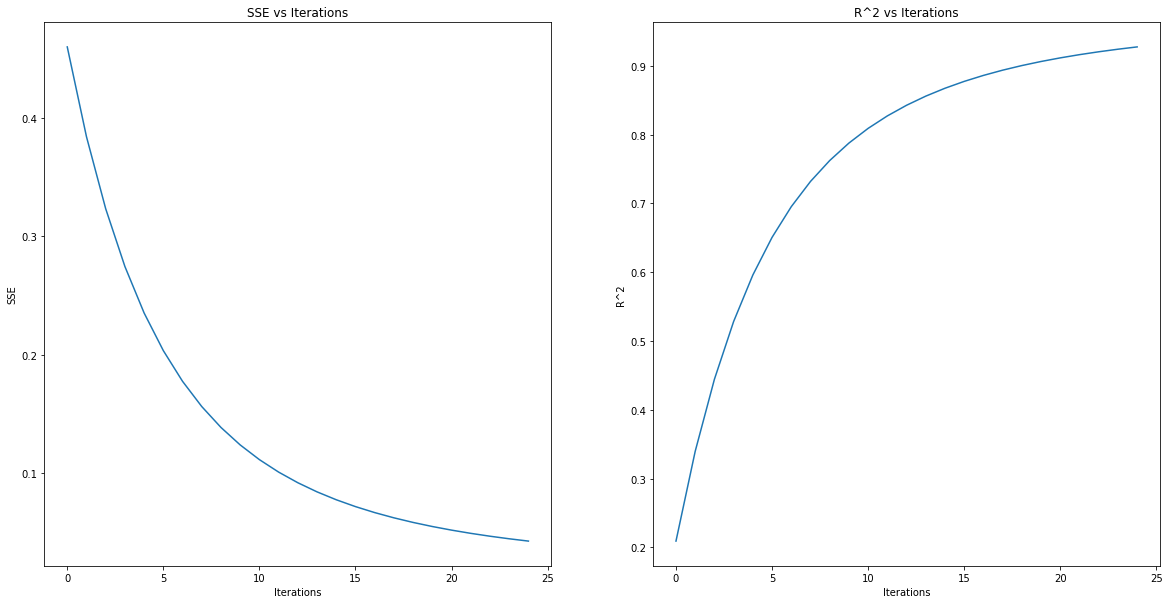

In [19]:
# Plotting our findings

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(x_list, sse_list)
plt.title('SSE vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('SSE')

plt.subplot(1, 2, 2)
plt.plot(x_list, rsq_list)
plt.title("R^2 vs Iterations")
plt.xlabel('Iterations')
plt.ylabel('R^2')

plt.show()